In [1]:
#importing libraries 
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Pixel Replication

In [2]:
img = cv2.imread('./Fig0241(c)(einstein high contrast).tif',0)
replacated_image = np.repeat(np.repeat(img,2, axis = 0), 2, axis=1)

# plt.imshow(replacated_image, cmap='gray')
# plt.show()
img.shape, replacated_image.shape

((679, 800), (1358, 1600))

### Up sampling /Interpolation

In [3]:
img = cv2.imread('./Fig0241(c)(einstein high contrast).tif')
frame = np.zeros((1024,1024,3), dtype = 'uint8')

a = 0; b = 0;
for i in range(frame.shape[0]//2):
    a = i*2
    for j in range(frame.shape[1]//2):
        b =j*2
        frame[a,b] = img[i,j]
cv2.imshow('Zoomed', frame)
# row interpolation
print(frame[0,1])
for i in range(0,1024,2):
    for j in range(1,1024, 2):
        p = j-1
        f = j+1
        if f == 1024:
            frame[i,j] = frame[i,p]/2
        else:
            frame[i,j] = frame[i,p]/2+frame[i, f]/2
print(frame[0,1])
cv2.imshow('Rowwise', frame)
#columns interpolation
print(frame[1,0])
for i in range (1,1024,2):
    p = i-1
    f = i+1
    for j in range(0,1024,2):
        if f == 1024:
            frame[i,j] = frame[p,j]/2
        else:
            frame[i, j] = frame[p,j]/2 + frame[f,j]/2
print(frame[1,0])
cv2.imshow('orginal', img)
cv2.imshow('Col', frame)

cv2.waitKey(0)
cv2.destroyAllWindows()

[0 0 0]
[65 65 65]
[0 0 0]
[65 65 65]


### Negative Image:
    Subtract from maximum possible value of the range.
    negative image is that image in which heigher intensities are interchanged with lower i.e 255 to 0 and 254 to 1 and so one...
    the obtained image is called negative of that image..
    if we already known that the heigher value of the input image is 255 then just subtract the image from 255...
    if we don't know about the heigest intensities of an input image than use max() on the image and then subtract from this...
    The graph of negative image is linear...

In [5]:
# 255-img will negate the image.. 
# if hieghest intensity is other than 255 then "max()" approach is better
img = cv2.imread('./Fig0304(a)(breast_digital_Xray).tif', cv2.IMREAD_GRAYSCALE)
cv2.imshow('Original', img)
negative = 255-img # np.max(img)-img
cv2.imshow('Negative breast', negative)
cv2.waitKey(0)
cv2.destroyAllWindows()

### log transformation
    This will reduce the higher intensities and spread the lower intensities in the image
    it is clear from the graph the heigher values are reduced so that they get norrower and lower intensities are gradually less reduced as compared to heigher intensities

	Value at location [0,0] in original image is:
	 3
	Value at location [0,0] in resultant image is:
	 27


Text(0, 0.5, 'Output')

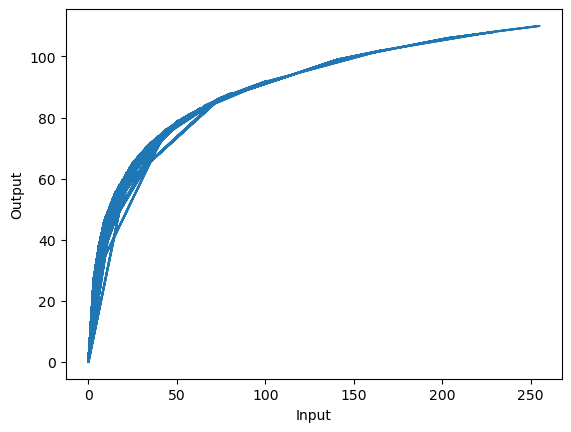

In [9]:
img = cv2.imread('./log.tif', cv2.IMREAD_GRAYSCALE)
frame = np.zeros((img.shape[0], img.shape[1]), dtype = 'uint8')
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        frame[i,j] = 20*np.log(img[i,j]+1)

cv2.imshow('Image', img)
cv2.imshow('Log transformed', frame)
cv2.waitKey(0)
cv2.destroyAllWindows()
print(f'\tValue at location [0,0] in original image is:\n\t {img[100,100]}')
print(f'\tValue at location [0,0] in resultant image is:\n\t {frame[100,100]}')
plt.plot(img.flatten(), frame.flatten())
plt.xlabel('Input'); plt.ylabel('Output')

### power transformation:
    This is is the inverse of log transformation..
    it will spread the higher intensities and reduces the lower intensities in the image..
    it will also set the intensities of output image in 0-255 range.. if exceeds it is subtracted from 255 until becomes fit in the range..
    s = c*r**gamma  it is sometimes used as
    s = c(r+E)**gamma  where c is a constant, E is epsilon and is a constant, gamma is a constant... all these can be varied for desired output

In [10]:
#implenting s = c(r+E)**gamma  where c =20, epsilon(E) = 10 and gamma is 0.4
img = cv2.imread('./spine.tif', cv2.IMREAD_GRAYSCALE)
frame1 = np.zeros((img.shape[0], img.shape[1]), dtype = 'uint8')
frame2 = np.zeros((img.shape[0], img.shape[1]), dtype = 'uint8')
frame3 = np.zeros((img.shape[0], img.shape[1]), dtype = 'uint8')
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        frame1[i,j] = 1*(img[i,j]+10)**0.6   # s = c(r+E)**gamma, gamma = 0.6, 
        frame2[i,j] = 20*(img[i,j]+10)**0.4   # s = c(r+E)**gamma, gamma = 0.4
        frame3[i,j] = 20*(img[i,j]+10)**0.3   # s = c(r+E)**gamma, gamma = 0.3
cv2.imshow('Original', img)
cv2.imshow('Gamma = 0.6', frame1)
cv2.imshow('Gamma = 0.4', frame2)
cv2.imshow('Gamma = 0.3', frame3)
cv2.waitKey(0)
cv2.destroyAllWindows()

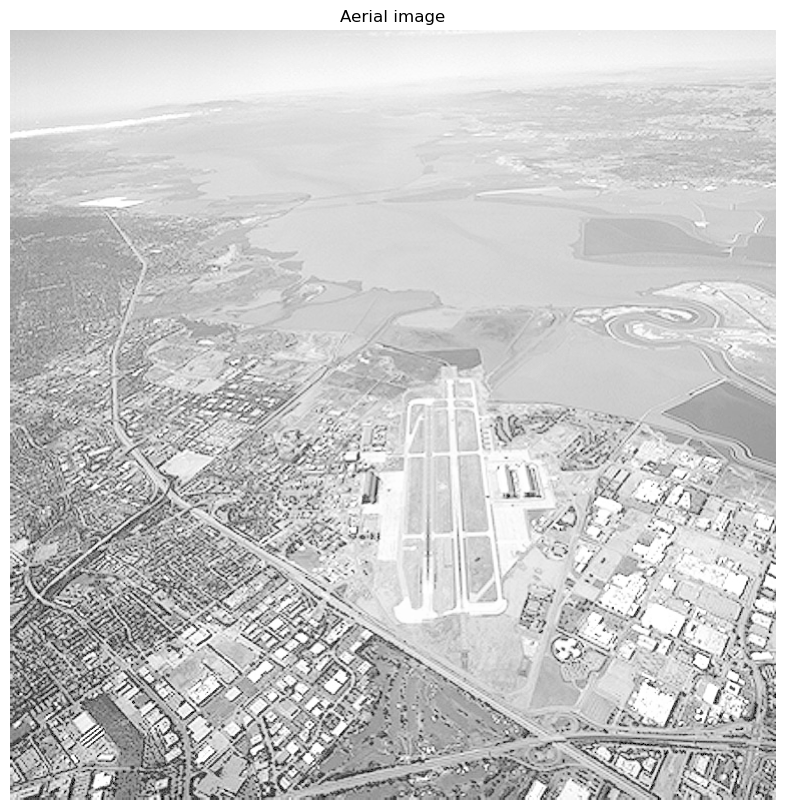

In [12]:
src_img = cv2.imread('./Fig0309(a)(washed_out_aerial_image).tif',0).astype(float)

plt.figure(figsize=(10,10))
plt.imshow(src_img,'gray')
plt.title('Aerial image')
plt.axis('off')
plt.show()

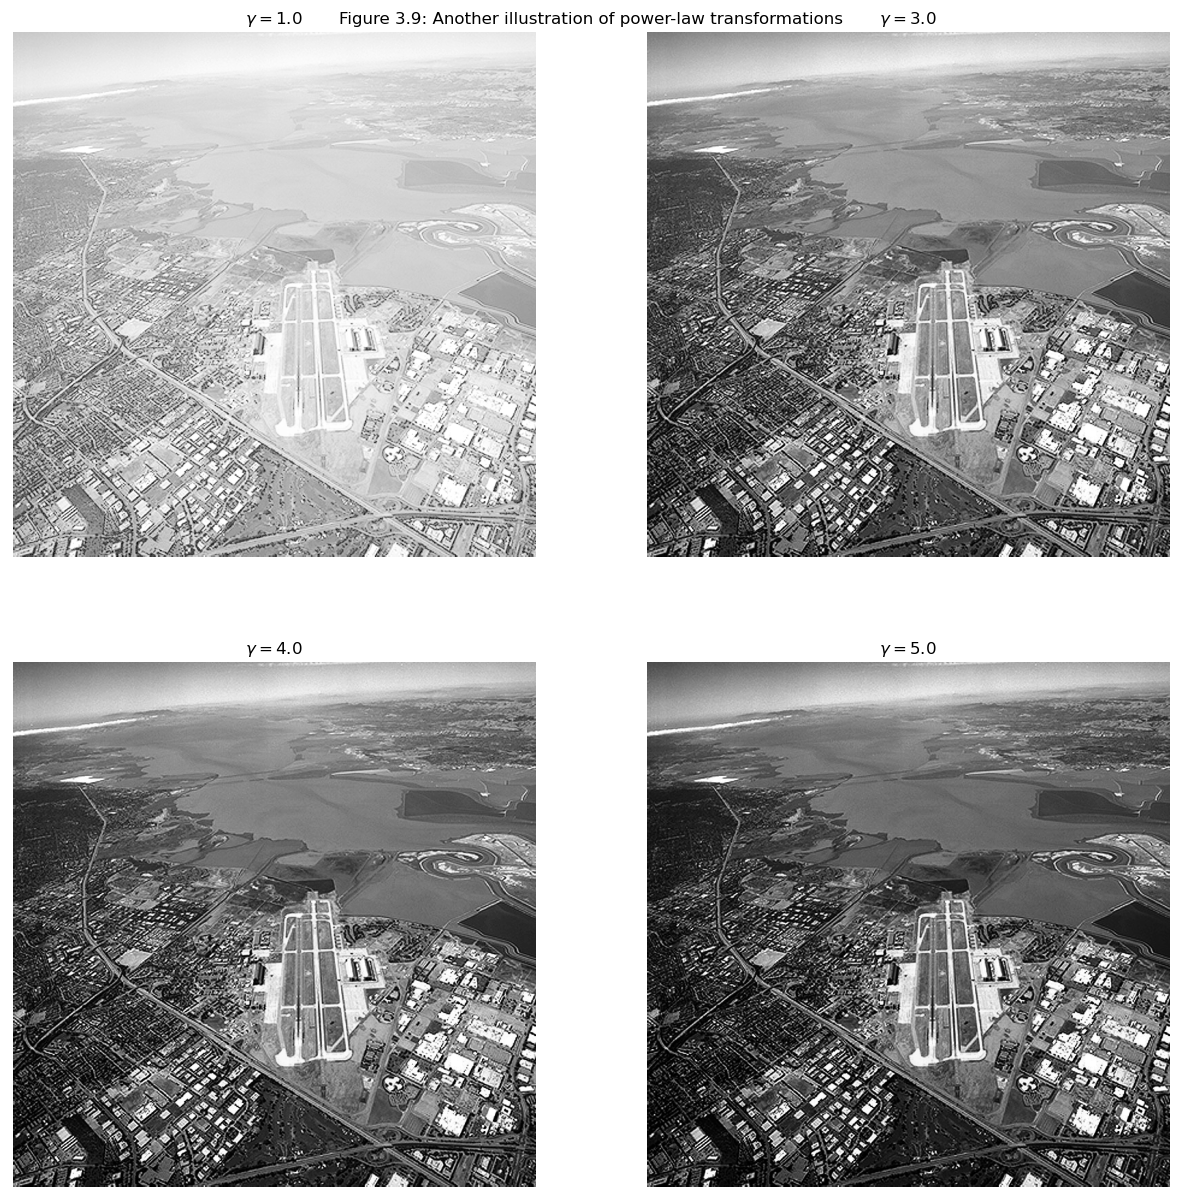

In [13]:
# contrast manipulation by power-law transformation
c = 1.0
gammas = [1.0, 3.0, 4.0, 5.0] # subfigure: a, b, c, d
dest_imgs = [c*src_img**gamma for gamma in gammas]
# plot Figure 3.9
fig = plt.figure(figsize=(15,15))
plt.title("Figure 3.9: Another illustration of power-law transformations")
plt.axis('off')
axeslist = fig.subplots(2,2)
for (i, axes) in enumerate(axeslist.ravel()):
    axes.imshow(dest_imgs[i],'gray')
    axes.set_title(f"$\gamma={gammas[i]}$")
    axes.set_axis_off()
plt.show()

In [15]:
#contrast streching
img = cv2.imread('./Fig0310(b)(washed_out_pollen_image).tif', cv2.IMREAD_GRAYSCALE)

frame = np.zeros((512,512), dtype = 'uint8')
for i in range(512):
    for j in range(512):
        if img[i,j] >= 127 and img[i,j]<=245:
            frame[i,j] = img[i,j]+10     #small intensities change upto 10 units
        elif img[i,j] >=10:
            frame[i,j] = img[i,j]-10
        else:
            frame[i,j] = img[i,j]
cv2.imshow('After stretching', frame)
cv2.imshow('Before contrast streching', img)
print(img[100,100])
print(frame[100,100])
cv2.waitKey(0)
cv2.destroyAllWindows()

112
102


### 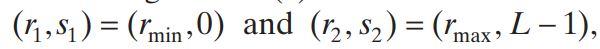

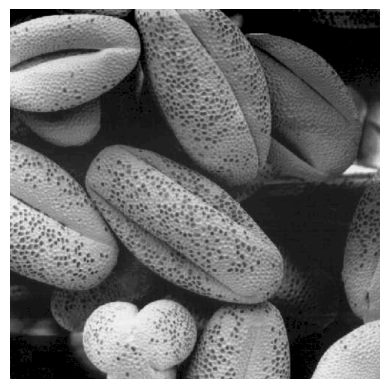

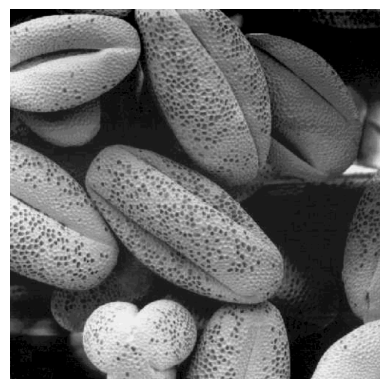

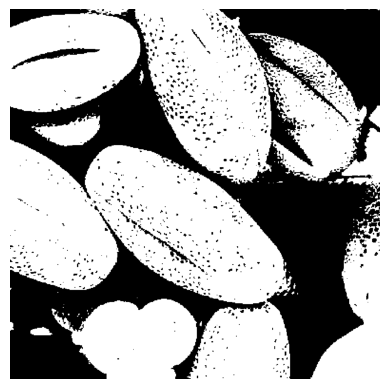

In [16]:
import matplotlib.pyplot as plt

# Read an image 
image = cv2.imread('./Fig0310(b)(washed_out_pollen_image).tif',0)
plt.axis('off')
plt.imshow(image, cmap='gray') 
plt.show()
# Apply contrast stretching method 
maxiI = 250
miniI = 3

maxoI = 155 
minoI = 0

stretched_image = image.copy()
# get height and width of the image  
  
for i in range(image.shape[0]): 
    for j in range(image.shape[1]): 
          
        # Get the pixel value 
        pixel = stretched_image[i, j] 
          
        # scale each pixel by this formula
        
          
        # 1st index contains red pixel 
        pixel = (pixel - miniI) * ((maxoI-minoI) / (maxiI-miniI)) + minoI  
          
        # 2nd index contains green pixel 
#         pixel[1] = (pixel[1] - miniI) * ((maxoI-minoI) / (maxiI-miniI)) + minoI 
          
#         # 3rd index contains blue pixel 
#         pixel[2] = (pixel[2] - miniI) * ((maxoI-minoI) / (maxiI-miniI)) + minoI 
          
        # Store new values in the pixel 
        stretched_image[i, j] = pixel
stretched_image *=2
plt.axis('off')
plt.imshow(stretched_image, 'gray')
plt.show()
thres = np.where(stretched_image>127, 255, 0)
plt.axis('off')
plt.imshow(thres, 'gray')
plt.show()